0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
(2016+0j) (-32+651.3749639995899j) (-32+324.9014524034835j) (-32+215.7264769732796j) (-32+160.87486374802714j) (-32+127.75116108064269j) (-32+105.48986268602627j) (-32+89.43400871969527j) (-32+77.25483399593904j) (-32+67.65831544155651j) (-32+59.867789177260455j) (-32+53.388774578672226j) (-32+47.891384405295646j) (-32+43.147005231575065j) (-32+38.99211281881524j) (-32+35.306559223471254j) (-32+32j) (-32+29.0031094086127j) (-32+26.261721306517124j) (-32+23.732817480705137j) (-32+21.381716413417557j) (-32+19.180061877821544j) (-32+17.10435635042532j) (-32+15.134872828522226j) (-32+13.254833995939045j) (-32+11.449783082064762j) (-32+9.707093875434971j) (-32+8.015582726121771j) (-32+6.365195756149063j) (-32+4.746751601227089j) (-32+3.151724907429241j) (-32+1.5720591926229304j) (-32+0j) (-32-1.5720591926229304j

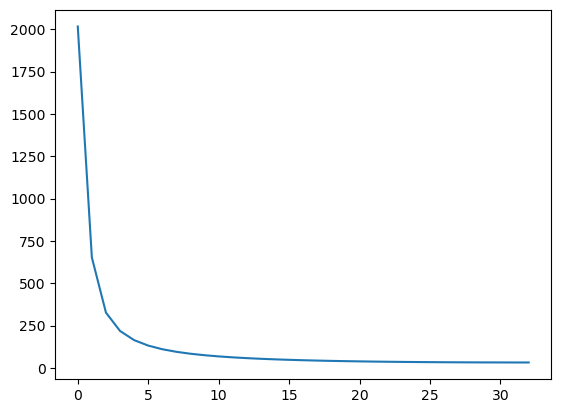

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 64
x = range(N)


print(*x)

goal = np.fft.fft(x)

print(*goal)
spec = abs(goal[0:int(N/2) + 1])
print(*spec)
plt.plot(spec)
plt.show()

In [4]:
w = np.zeros(N, dtype=complex)

inR = np.zeros(N)

width = int(np.log2(N))
for i in range(N):
    b = '{:0{width}b}'.format(i, width=width)
    br = int(b[::-1], 2)
    inR[br] = x[i]    
    w[i] = np.round(np.exp(-2*1j*np.pi*(i / N)), 14)

print(*inR)
print(*w)

0.0 32.0 16.0 48.0 8.0 40.0 24.0 56.0 4.0 36.0 20.0 52.0 12.0 44.0 28.0 60.0 2.0 34.0 18.0 50.0 10.0 42.0 26.0 58.0 6.0 38.0 22.0 54.0 14.0 46.0 30.0 62.0 1.0 33.0 17.0 49.0 9.0 41.0 25.0 57.0 5.0 37.0 21.0 53.0 13.0 45.0 29.0 61.0 3.0 35.0 19.0 51.0 11.0 43.0 27.0 59.0 7.0 39.0 23.0 55.0 15.0 47.0 31.0 63.0
(1+0j) (0.9951847266722-0.09801714032956j) (0.98078528040323-0.19509032201613j) (0.95694033573221-0.29028467725446j) (0.92387953251129-0.38268343236509j) (0.88192126434836-0.471396736826j) (0.83146961230255-0.5555702330196j) (0.77301045336274-0.63439328416365j) (0.70710678118655-0.70710678118655j) (0.63439328416365-0.77301045336274j) (0.5555702330196-0.83146961230255j) (0.471396736826-0.88192126434836j) (0.38268343236509-0.92387953251129j) (0.29028467725446-0.95694033573221j) (0.19509032201613-0.98078528040323j) (0.09801714032956-0.9951847266722j) -1j (-0.09801714032956-0.9951847266722j) (-0.19509032201613-0.98078528040323j) (-0.29028467725446-0.95694033573221j) (-0.38268343236509-

In [5]:
off = 0
def gen4():
    return [f"{off}", f"{off + 1}", f"{off  +2}", f"{off + 1}"]


def gen(i):
    global off
    l = []

    if i == 4:
        l+= gen4()
        off += 4
    else:
        l+= gen(i//2)
        l+= gen(i//2)
        l[i//4] = f"{(off-i)+i//4}"
        l[3*i//4] = f"{(off-i)+i//4}"
        

    return l


from collections import namedtuple


Pair = namedtuple("Pair", ['i1','i2'])

gg = gen(N)

special = []

pairs = []

for j in range(N//2 + 1):
    if j == 0 or j == N//2:
        pairs.append(Pair(j,j))
        continue

    val1 = -1
    val2 = -1
    for i in range(len(gg)):
        if int(gg[i]) == j or N-int(gg[i]) == j:
            if i > N//2 and val1 == -1:
                special.append(N-i)
            if val1 == -1:
                val1 = i
                continue
            if val2 == -1:
                val2 = i
                break
    pairs.append(Pair(val1,val2))

29
2016.0 652.1605199070788 326.4735115961076 218.08693878199915 164.02658865545698 131.69798463701923 110.23661428725391 94.986535444107 83.62002975208826 74.84415573970485 67.88337190338252 62.24436722316626 57.598478280730774 53.71837730659352 50.441895900880084 47.650321344147756 45.254833995939045 43.187733853120996 41.39659413503936 39.8402638742825 38.486072763843055 37.30783796519304 36.28441822824724 35.39864934620447 34.63655040935667 33.9867258297464 33.43991135613998 32.98862783504818 32.626917062666216 32.35014143344268 32.15483431604237 32.038591887052426 32.0


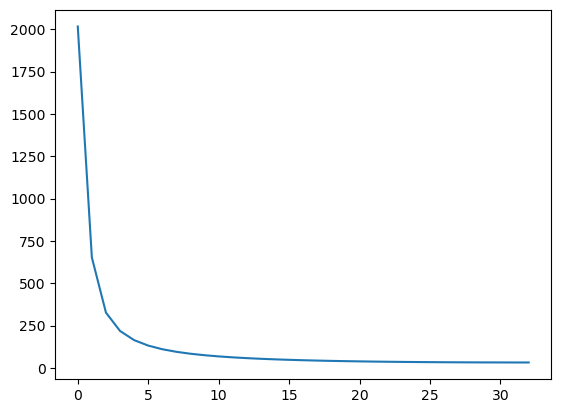

In [6]:
v = np.copy(inR)

p = N
maxWi = 0

while p > 1:
    p = p//2
    c = N//(2*p)
    r = 0
    rC = c

    for j in range(p):
        for i in range(c):
            if i == c//2 and c != 1:
                continue
            buf = v[r + i]
            v[r + i] = v[r + i] + v[rC + i]
            v[rC + i] = buf + (-1)*v[rC + i]
        r += 2*c
        rC += 2*c
    
    

    if p == 1:
        break

    rC = 2*c

    for j in range(p//2):
        for i in range(1,2*c):
            wi = i*(p//2)         
            if N%wi == 0 and N//wi == 4:
                v[rC + i] = (-1)*v[rC + i]
            elif wi not in special: 
                tr = np.real(w[wi])
                ti = np.imag(w[wi])

                if wi > maxWi:
                    maxWi = wi

                pairI = 0
                if (rC+i) < N//2:
                    pairI = (rC+i)
                else:
                    pairI = N-(rC+i)

                dis = pairs[pairI].i2 - pairs[pairI].i1 
                       
                buf = v[rC + i]
                v[rC + i] = v[rC + i]*tr + (-1)*(v[rC + i + dis]*ti)
                v[rC + i + dis] = buf*ti + v[rC + i + dis]*tr
        rC += 4*c

calcSpec = []

for pair in pairs:
    if pair.i1 == pair.i2:
        calcSpec.append(v[pair.i1] * v[pair.i1])
    else:
        calcSpec.append(v[pair.i1] * v[pair.i1] + v[pair.i2] * v[pair.i2])

calcSpec = np.sqrt(calcSpec)

print(maxWi)

print(*calcSpec)
plt.plot(calcSpec)
plt.show()